In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load


import numpy as np # linear algebra
import pandas as pd # data processing, data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph




from sklearn.linear_model import LogisticRegression # Logistic regression model
from sklearn.model_selection import train_test_split # to split the data into training and test set
from sklearn.model_selection import KFold # use for cross validation
from sklearn.model_selection import GridSearchCV# for tuning parameter of models
from sklearn.ensemble import RandomForestClassifier # for random forest classifier model
from sklearn.neighbors import KNeighborsClassifier # for K Neighbors model
from sklearn.tree import DecisionTreeClassifier # for Decision Tree model
from sklearn import svm # for Support Vector Machine model
from sklearn import metrics # for the check the error and accuracy of the model

### Read the data



In [4]:
### Read the data
data=pd.read_csv("C:\\Users\\surface\\project1\\data\\data.csv") # import from a csv file
data.drop("Unnamed: 32",axis=1,inplace=True) # delete unnecessary columns

In [5]:
#### transform the problem into binary classification : Malignant = 1 ans Benign = 0 ###
data['diagnosis']=data['diagnosis'].replace({'M':1,'B':0}) 
data.head(5) # show data

C:\Users\surface\AppData\Local\Temp\ipykernel_10392\1748497345.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['diagnosis']=data['diagnosis'].replace({'M':1,'B':0})


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
# the data can be divided into three parts corresponding to 3 dimensional features '(mean, se, worst)' 
# computed with the  the 3 dimensonial values (X,Y,Z)

features_mean= list(data.columns[2:12]) # mean group
features_se= list(data.columns[12:22]) # standard error group
features_worst=list(data.columns[22:32]) # features_worst group

print("-----------------------------------")
print('Mean set of all features')
print(features_mean)
print(len(features_mean), 'features')
print("-----------------------------------")
print('Standard Error set of all features')
print(features_se)
print(len(features_se), 'features')
print("------------------------------------")
print('Worst set of all features')
print(features_worst)
print(len(features_worst), 'features')
print(' ')
print('Description of data columns')
data.iloc[:,1:].describe() # description of all columns in the dataset (30 features + diagnosis)

-----------------------------------
Mean set of all features
['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
10 features
-----------------------------------
Standard Error set of all features
['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se']
10 features
------------------------------------
Worst set of all features
['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']
10 features
 
Description of data columns


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


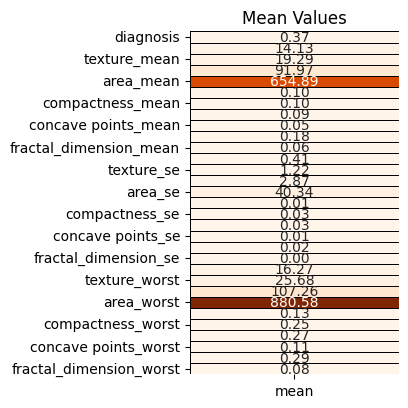

In [8]:
#mean value 
fig,ax = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5))

colors = ['#FF781F','#2D2926']
plt.subplot(1,1,1)
sns.heatmap(data.iloc[:,1:].describe().T[['mean']],cmap = 'Oranges',annot = True,fmt = '.2f',linecolor = 'black',linewidths = 0.4,cbar = False);
plt.title('Mean Values');

fig.tight_layout(pad = 4)

C:\Users\surface\AppData\Local\Temp\ipykernel_10392\1253270993.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diagnosis', y=feature, data=data, palette='Set2', ax=axes[row, col])
C:\Users\surface\AppData\Local\Temp\ipykernel_10392\1253270993.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diagnosis', y=feature, data=data, palette='Set2', ax=axes[row, col])
C:\Users\surface\AppData\Local\Temp\ipykernel_10392\1253270993.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diagnosis', y=feature, data=data, palette='Set2', ax

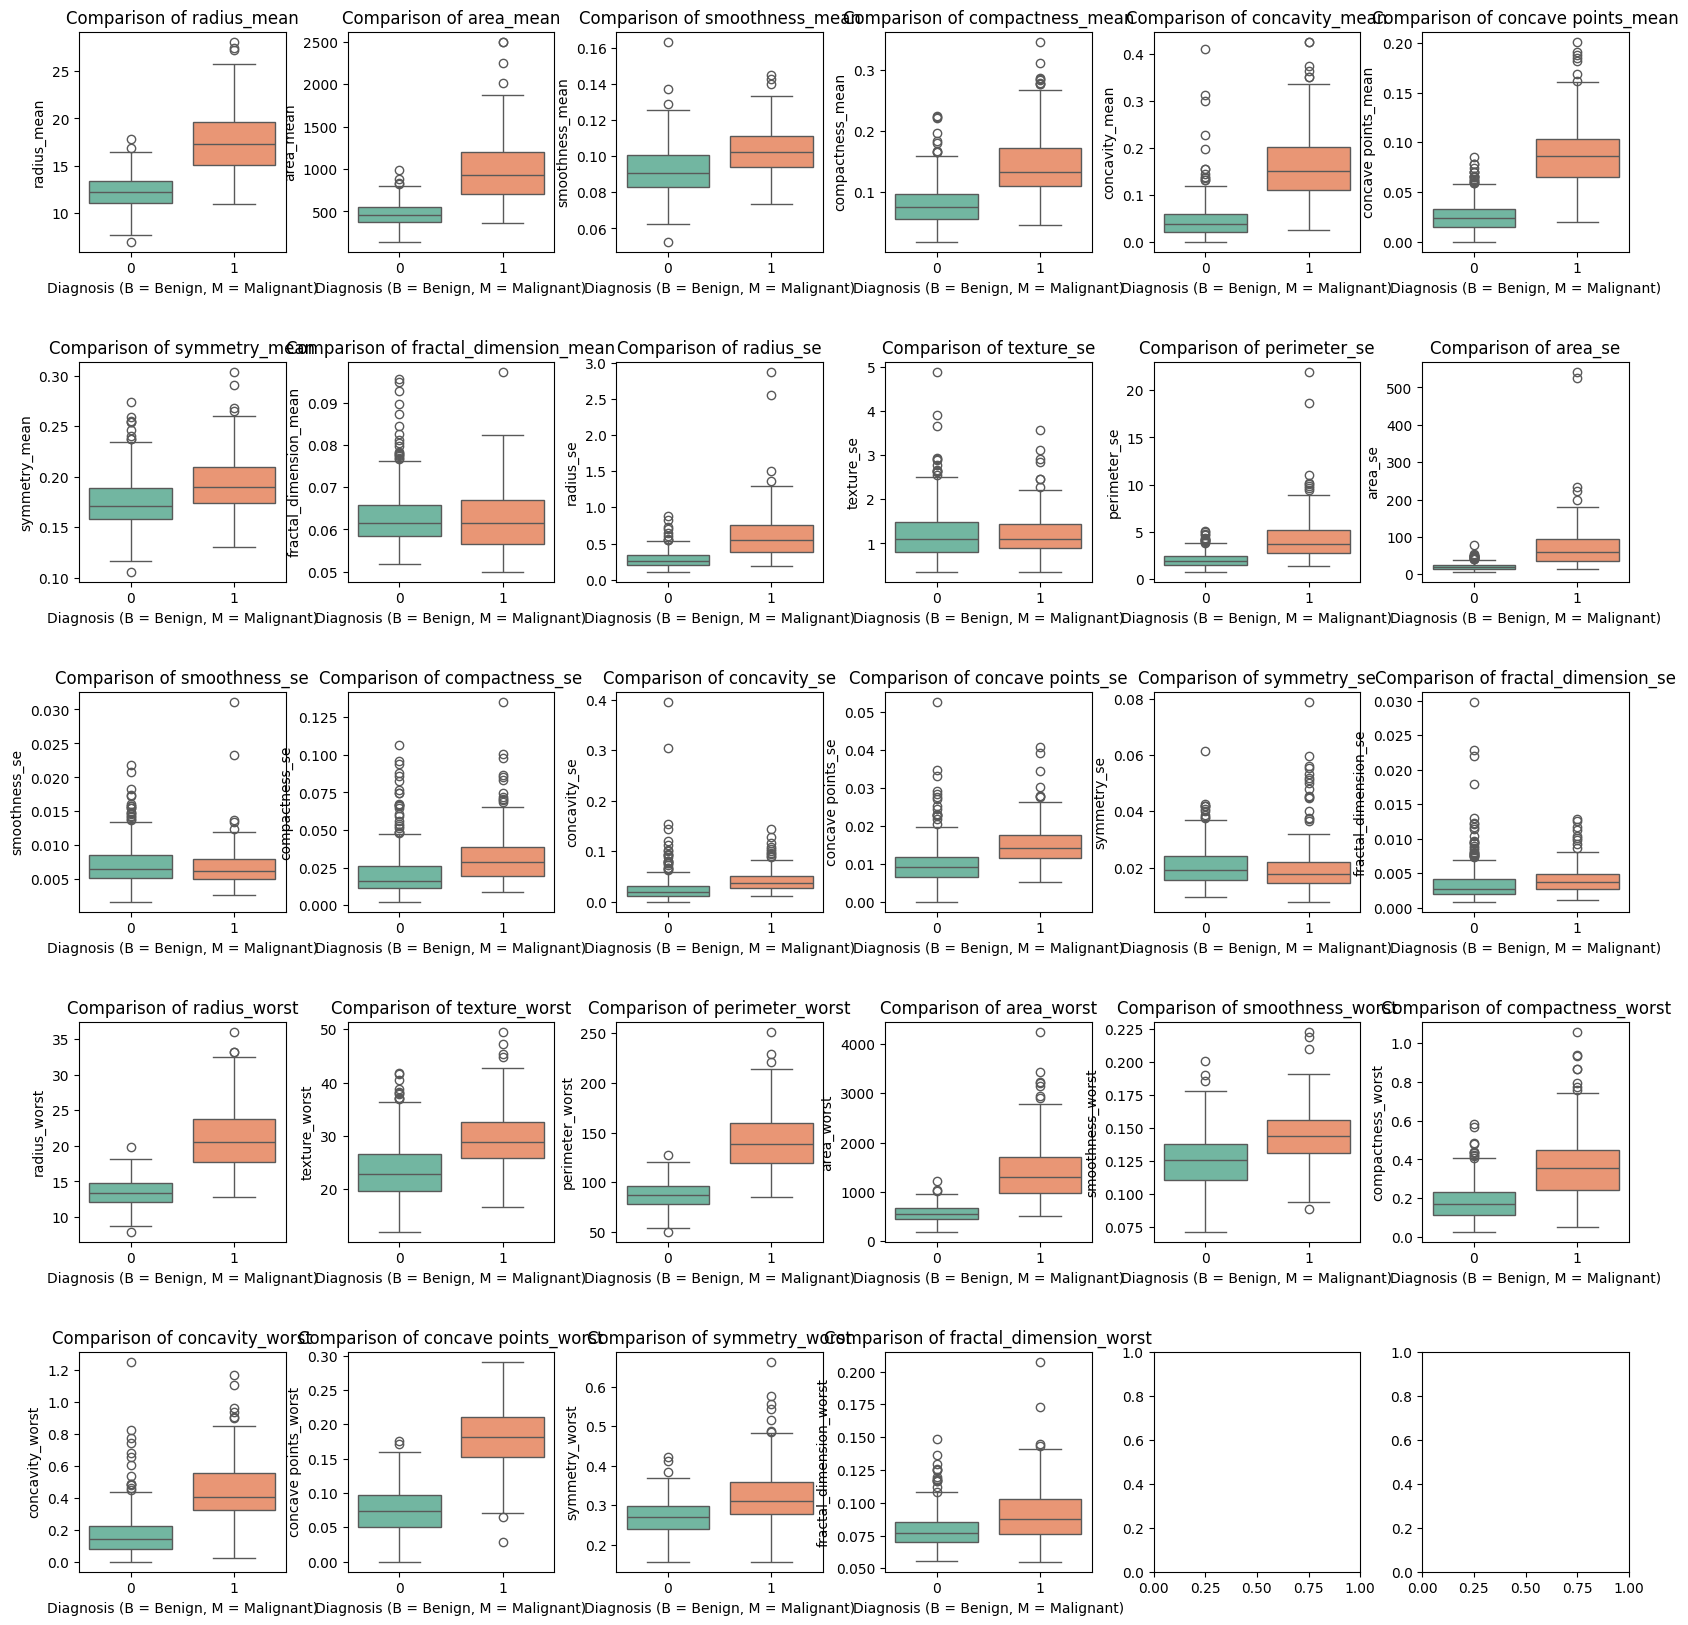

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

features = ['radius_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
            'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se',
            'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']

fig, axes = plt.subplots(nrows=5, ncols=6, figsize=(20, 20))  
for i, feature in enumerate(features):
    row = i // 6 
    col = i % 6  
    sns.boxplot(x='diagnosis', y=feature, data=data, palette='Set2', ax=axes[row, col])
    axes[row, col].set_title(f'Comparison of {feature}')
    axes[row, col].set_xlabel('Diagnosis (B = Benign, M = Malignant)')
    axes[row, col].set_ylabel(feature)

plt.subplots_adjust(hspace=0.5, wspace=0.3)

plt.show()


<Axes: >

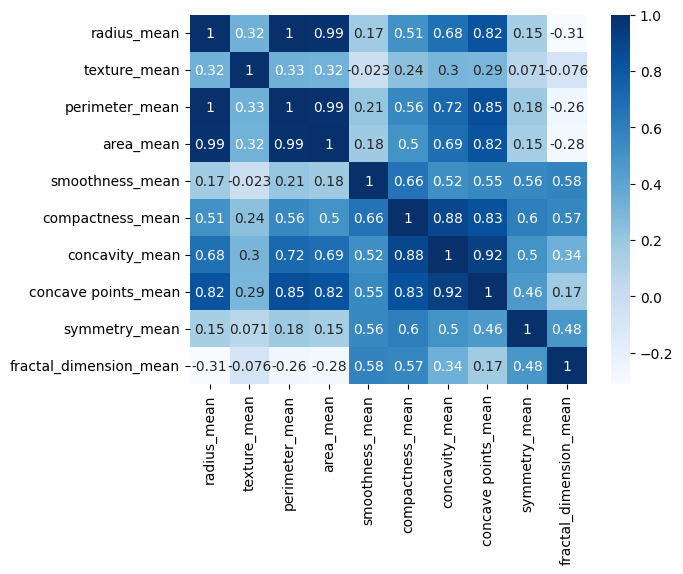

In [10]:


    #Study of the correlations between the 10 variables of the 3 groups.
    #The darker a box is, the more the 2 associated features are correlated.


sns.heatmap(data[features_mean].corr(),annot=True,cmap='Blues')




<Axes: >

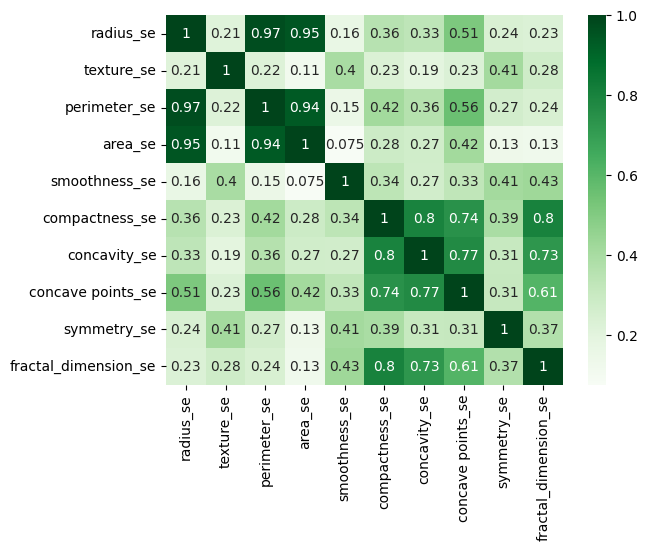

In [11]:
sns.heatmap(data[features_se].corr(),annot=True,cmap='Greens')


<Axes: >

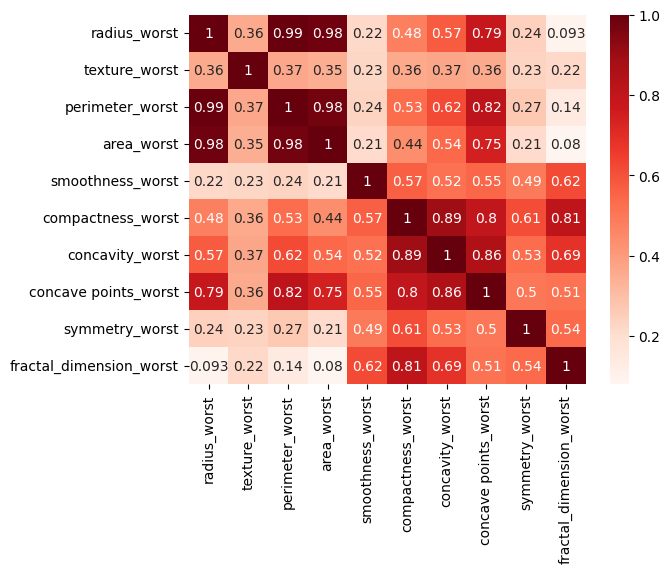

In [12]:
sns.heatmap(data[features_worst].corr(),annot=True,cmap='Reds')

In [13]:
#####  delete features higly corrolated described above  ###########

col_to_drop_corrolated1=['radius_mean','radius_se','radius_worst','area_mean','area_se','area_worst']
col_to_drop_corrolated2=['concavity_mean','concave points_mean', 'concavity_se','concave points_se' ,'concavity_worst','concave points_worst']
data.drop(col_to_drop_corrolated1+col_to_drop_corrolated2,axis=1,inplace=True)
print('I keep only ', len(data.columns) ,' features which are not so corrolated based on the previous analysis')

I keep only  20  features which are not so corrolated based on the previous analysis


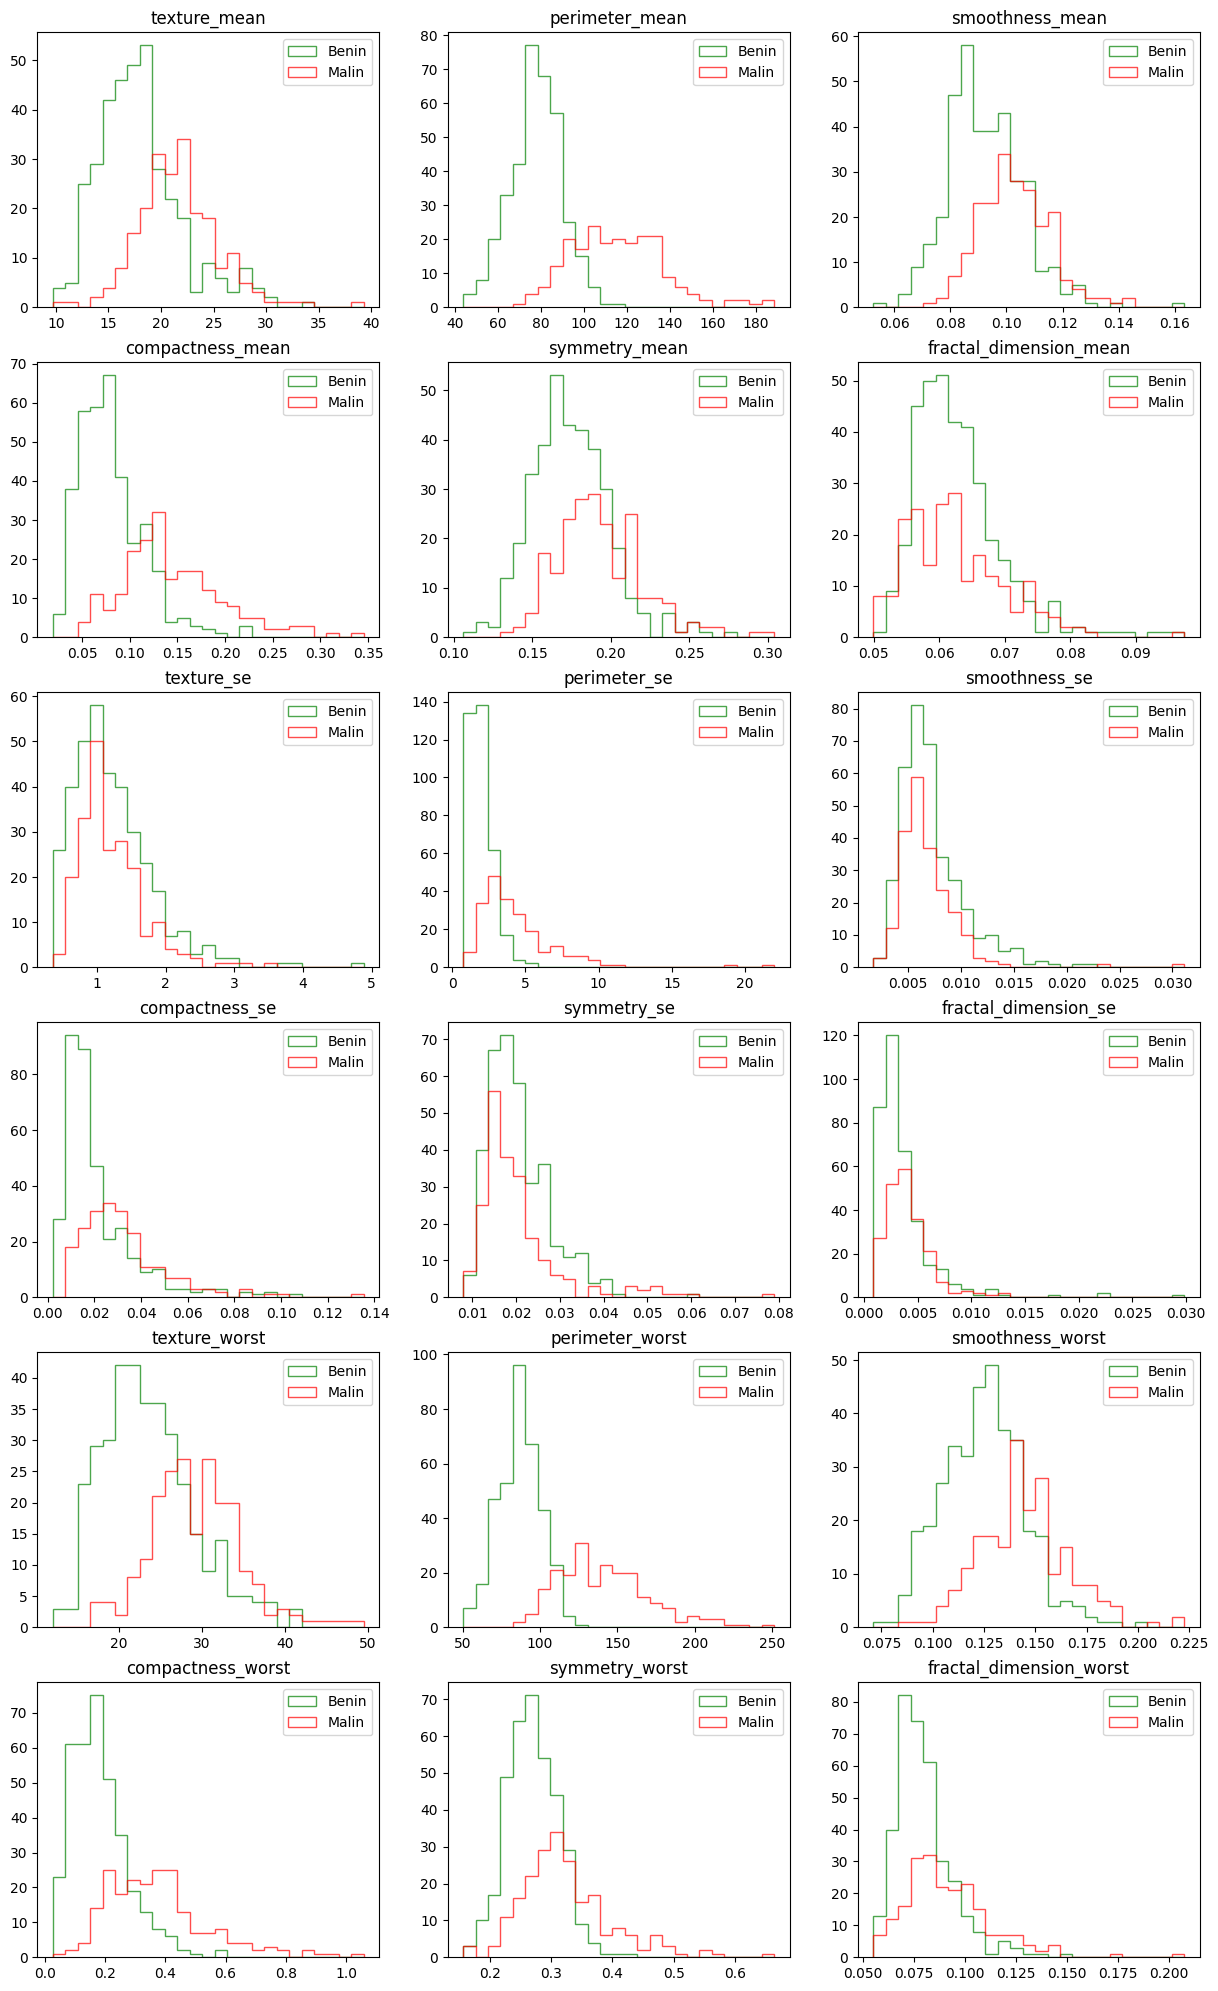

In [14]:
predict = data.diagnosis.unique() # unique values from diagnosis features : 1 and 0
predict_n=['Malin', 'Benin'] # labels

fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(15,25)) # axis configuration : 18 features on 6 * 3 charts
i=0
axes = axes.ravel()
for idx,ax in enumerate(axes): # for each chart
    col=data.columns[i+2]
    i=i+1
    ax.hist([data.loc[data.diagnosis == x, col] for x in predict], label=predict_n, bins=25,stacked=False, alpha=0.7,color=['r','g'], histtype='step') # plot the feature histogram 
    ax.legend(loc='upper right') # legend of each chart
    ax.set_title(col) # title

plt.show() # show the 18 charts

In [15]:
col_to_drop_mean=['fractal_dimension_mean', 'symmetry_mean', 'smoothness_mean', 'texture_mean'] # mean variables not efficient for detection
col_to_drop_se=['fractal_dimension_se', 'symmetry_se', 'smoothness_se', 'texture_se'] # Standard error variables not efficient for detection
col_to_drop_worst=['fractal_dimension_worst'] # Worst variable not efficient for detection
col_to_drop_tot=col_to_drop_mean+col_to_drop_se+col_to_drop_worst
data.drop(col_to_drop_tot,axis=1,inplace=True)
print('Now the data set is only composed of ', len(data.columns), 'features')

Now the data set is only composed of  11 features


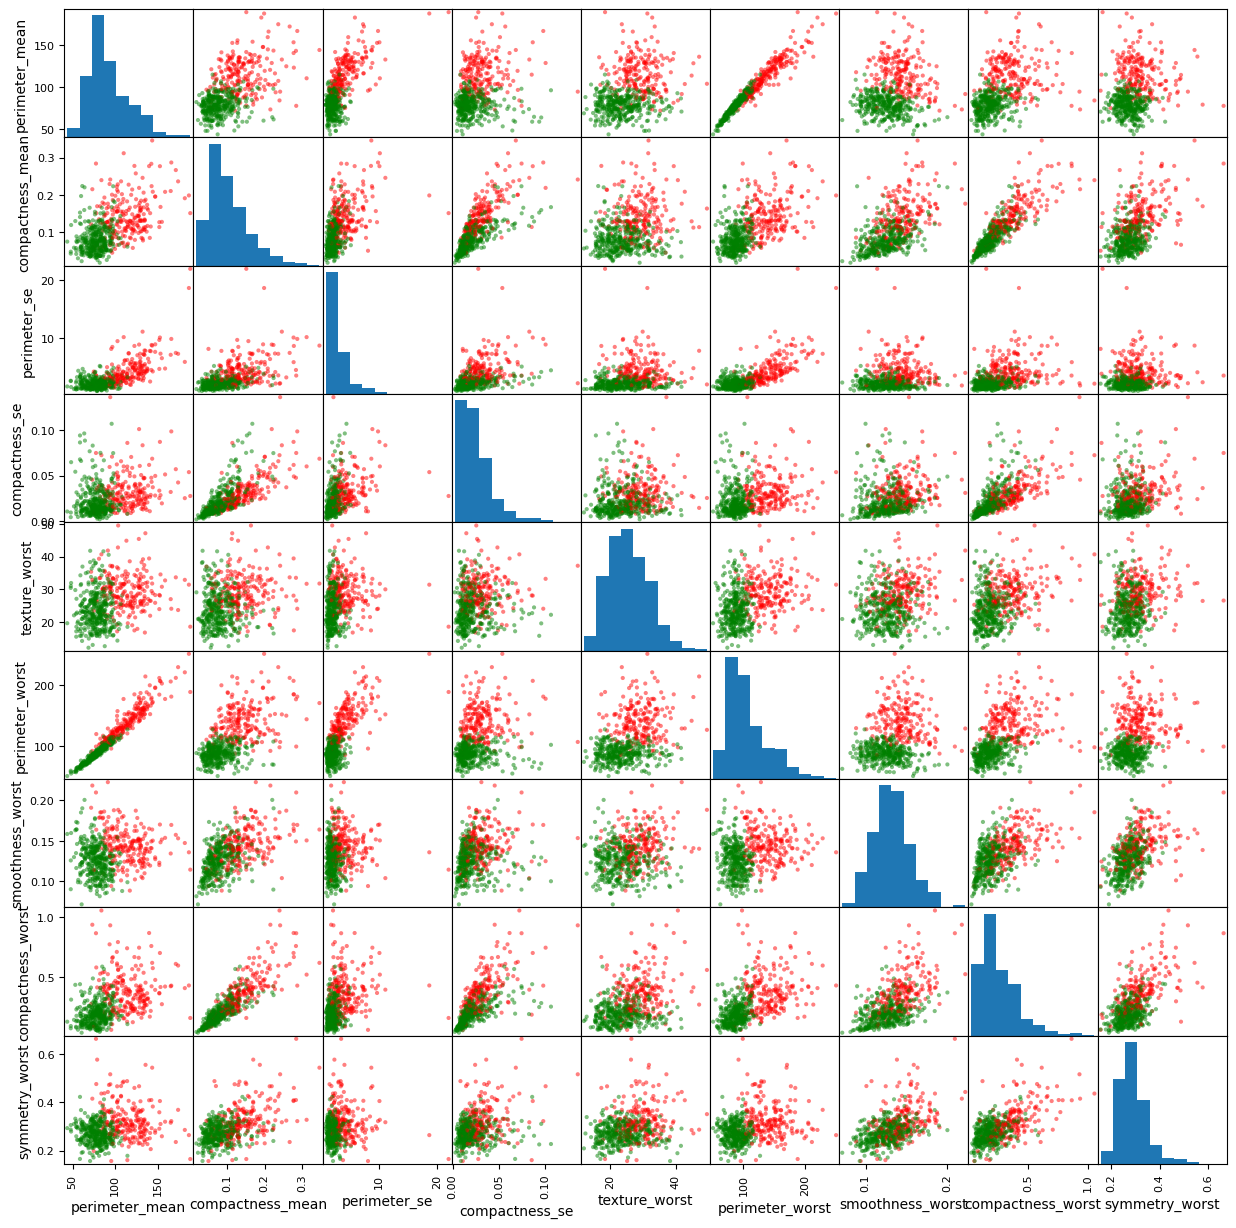

In [18]:
color_function = {0: "green", 1: "red"} # Here Red color will be 1 which means M and blue foo 0 means B
colors = data["diagnosis"].map(lambda x: color_function.get(x))# mapping the color fuction with diagnosis column
pd.plotting.scatter_matrix(data.iloc[:,2:], c=colors, alpha = 0.5, figsize = (15, 15)); # plotting scatter plot matrix

In [16]:
selected_features = data.iloc[:, 2:].columns
print("varialbes:", selected_features)
print("numbers:", len(selected_features))



varialbes: Index(['perimeter_mean', 'compactness_mean', 'perimeter_se', 'compactness_se',
       'texture_worst', 'perimeter_worst', 'smoothness_worst',
       'compactness_worst', 'symmetry_worst'],
      dtype='object')
numbers: 9


In [ ]:
######## Classification model fonction that apply each above algortihm to the data and compute the scores on each fold of the cross validation   ###########

from sklearn.preprocessing import StandardScaler # To norm the data

train, test = train_test_split(data, test_size = 0.3)# main data is splitted into train and test set

# As we are going to use many models lets make a function which we can use with different models
def classification_model(model,data,prediction_input,output):
   
    """ 
    paramters:
        model : name of the model tested (Decision Tree, SVM, KNN, RandomForest), sklearn object.
        data : Main dataframe of all data, pandas dataframe.
        prediction_input : name of the prediction variables, in our case it is the 9 features described above, list(str).
        output : name of target variable, in our case it is the diagnosis feature, str.
        
    return:
        None 
        (print accuracy and cross validation score of each models)
    """
    

    #Fit the model:
    train, test = train_test_split(data, test_size = 0.3,random_state=42) # in this our main data is splitted into train (70%) and test (30%) into the function (local variables)
    train_X = train[prediction_input] # taking the training data input 
    train_y=train.diagnosis # This is output of our training data
    
    # same for data test
    test_X= test[prediction_input] # taking test data inputs
    test_y =test.diagnosis   #output value of test data
    
    # norm the data with mean of 0 and standard deviation of 1
    
    sc = StandardScaler()  
    sc.fit(train_X)  # 只对训练集进行 fit
    train_X = sc.transform(train_X)  
    test_X = sc.transform(test_X)  # 只 transform 测试集
    model.fit(train_X,train_y) #Here we fit the model using training set
  
    #Make predictions on test set:
    predictions = model.predict(test_X)
  

    #compute metrics for evaluation
   
    accuracy = metrics.accuracy_score(test_y, predictions)
    f1 = metrics.f1_score(test_y, predictions)
    precision = metrics.precision_score(test_y, predictions)
    recall = metrics.recall_score(test_y, predictions)
    balanced_accuracy = metrics.balanced_accuracy_score(test_y, predictions)


 
    # Cross validation on 5 random folds 
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    
    error = []
    print(kf)
    print('  ')
    
    # For each folds, we fit the model and compute the accuracy, to prevent overfitting
    for train, test in kf.split(data):
        # as the data is divided into train and test using KFold
        # so here also we are going to fit model
        #in the cross validation the data in train and test will change for evry iteration
        train_X = (data[prediction_input].iloc[train,:])# this iloc method is used for selecting trainig data
        train_y = data[output].iloc[train]# here is only column so it repersenting only row in train
        
        train_X = sc.transform(train_X) # Scale the train data
        
        # Training the algorithm using the predictors and target.
        model.fit(train_X, train_y)
    
        # now do this for test data also
        test_X=data[prediction_input].iloc[test,:]
        test_y=data[output].iloc[test]
        test_X = sc.transform(test_X)
        
        # compute the score on test set
        error.append(model.score(test_X,test_y))

      # printing the score 
        print("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))
        
         #create a dataframe to visualize the results
    eval_df = pd.DataFrame([[accuracy, f1, precision, recall, balanced_accuracy]], columns=['accuracy', 'f1_score', 'precision', 'recall', 'balanced_accuracy'])
    return eval_df
 

In [21]:
lg = LogisticRegression()
classification_model(model,data,prediction_var,outcome_var)

KFold(n_splits=5, random_state=42, shuffle=True)
  
Cross-Validation Score : 92.982%
Cross-Validation Score : 94.298%
Cross-Validation Score : 93.275%
Cross-Validation Score : 92.982%
Cross-Validation Score : 92.970%


,accuracy,f1_score,precision,recall,balanced_accuracy
0,0.918129,0.892308,0.865672,0.920635,0.918651


In [20]:
model = DecisionTreeClassifier()
prediction_var=data.columns[2:]
outcome_var= "diagnosis"
classification_model(model,data,prediction_var,outcome_var)

KFold(n_splits=5, random_state=42, shuffle=True)
  
Cross-Validation Score : 92.982%
Cross-Validation Score : 94.298%
Cross-Validation Score : 92.982%
Cross-Validation Score : 92.982%
Cross-Validation Score : 92.793%


,accuracy,f1_score,precision,recall,balanced_accuracy
0,0.923977,0.899225,0.878788,0.920635,0.92328


In [22]:
model = KNeighborsClassifier()
classification_model(model,data,prediction_var,outcome_var)

KFold(n_splits=5, random_state=42, shuffle=True)
  
Cross-Validation Score : 93.860%
Cross-Validation Score : 95.614%
Cross-Validation Score : 95.614%
Cross-Validation Score : 95.833%
Cross-Validation Score : 95.074%


,accuracy,f1_score,precision,recall,balanced_accuracy
0,0.953216,0.935484,0.95082,0.920635,0.946429


In [23]:
model = RandomForestClassifier(n_estimators=100)
classification_model(model,data,prediction_var,outcome_var)

KFold(n_splits=5, random_state=42, shuffle=True)
  
Cross-Validation Score : 96.491%
Cross-Validation Score : 97.368%
Cross-Validation Score : 95.906%
Cross-Validation Score : 95.833%
Cross-Validation Score : 95.782%


,accuracy,f1_score,precision,recall,balanced_accuracy
0,0.976608,0.967742,0.983607,0.952381,0.971561


In [24]:
model = svm.SVC()
classification_model(model,data,prediction_var,outcome_var)

KFold(n_splits=5, random_state=42, shuffle=True)
  
Cross-Validation Score : 94.737%
Cross-Validation Score : 96.930%
Cross-Validation Score : 96.491%
Cross-Validation Score : 96.272%
Cross-Validation Score : 95.779%


,accuracy,f1_score,precision,recall,balanced_accuracy
0,0.964912,0.952381,0.952381,0.952381,0.962302


In [25]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Function for Grid Search with Cross-Validation
def classification_model_gridsearchCV(model, param_grid, data_X, data_y, cv=5):
    """
    Perform Grid Search with Cross-Validation.

    Parameters:
        model : sklearn model (e.g., SVM)
        param_grid : dict, hyperparameters to tune
        data_X : array-like, training feature data
        data_y : array-like, training labels
        cv : int, number of cross-validation folds (default = 5)

    Returns:
        best_params : dict, best hyperparameters
        best_score : float, best accuracy score
        best_model : trained model with best parameters
    """

    clf = GridSearchCV(model, param_grid, cv=cv, scoring="accuracy", n_jobs=-1, verbose=1)
    clf.fit(data_X, data_y)

    best_params = clf.best_params_
    best_score = clf.best_score_
    best_model = clf.best_estimator_

    print(f"Best Parameters: {best_params}")
    print(f"Best Accuracy: {best_score:.4f}")

    return best_params, best_score, best_model


# ==== Step 1: Load and Split Data ====
train, test = train_test_split(data, test_size=0.3, random_state=42, stratify=data['diagnosis'])

# Select input features and target variable
train_X = train[prediction_var].copy()
train_y = train['diagnosis'].copy()
test_X = test[prediction_var].copy()
test_y = test['diagnosis'].copy()

# ==== Step 2: Normalize Data ====
sc = StandardScaler()
train_X = sc.fit_transform(train_X)  # Fit on training set and transform
test_X = sc.transform(test_X)  # Only transform test set (no fit to avoid data leakage)

# ==== Step 3: Define SVM Hyperparameter Grid ====
param_grid = {
    'C': [0.65, 0.75, 0.8, 1],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

# ==== Step 4: Run GridSearchCV ====
model = svm.SVC()
best_params, best_score, best_model = classification_model_gridsearchCV(model, param_grid, train_X, train_y)

# ==== Step 5: Evaluate the Best Model on Test Data ====
test_predictions = best_model.predict(test_X)

test_accuracy = accuracy_score(test_y, test_predictions)
test_f1 = f1_score(test_y, test_predictions)
test_precision = precision_score(test_y, test_predictions)
test_recall = recall_score(test_y, test_predictions)

print("\n=== Model Evaluation on Test Set ===")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test F1 Score: {test_f1:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters: {'C': 0.65, 'kernel': 'rbf'}
Best Accuracy: 0.9672

=== Model Evaluation on Test Set ===
Test Accuracy: 0.9649
Test F1 Score: 0.9516
Test Precision: 0.9833
Test Recall: 0.9219


In [29]:
!pip install keras

  Using cached keras-3.8.0-py3-none-any.whl.metadata (5.8 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached namex-0.0.8-py3-none-any.whl.metadata (246 bytes)
  Using cached markdown_it_py-3.0.0-py3-none-any.whl.metadata (6.9 kB)
  Using cached mdurl-0.1.2-py3-none-any.whl.metadata (1.6 kB)
Using cached keras-3.8.0-py3-none-any.whl (1.3 MB)
Using cached absl_py-2.1.0-py3-none-any.whl (133 kB)
   ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
   ---------------------------------------- 3.0/3.0 MB 16.0 MB/s eta 0:00:00
Using cached namex-0.0.8-py3-none-any.whl (5.8 kB)
Using cached markdown_it_py-3.0.0-py3-none-any.whl (87 kB)
Using cached mdurl-0.1.2-py3-none-any.whl (10.0 kB)


In [31]:
!pip install tensorflow

  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.1.24-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached protobuf-5.29.3-cp310-abi3-win_amd64.whl.metadata (592 bytes)
  Using cached termcolor-2.5.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached tensorboard-2.18.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached Markdown-3.7-py3-none-any.whl.metadata (7.0 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
  Using cached werkzeug-3.1.3-py3-none-any.whl.metadata (3.7 kB)
   ---------------------------------------- 0.0/390.3 MB ? eta -:--:--
   ---------------------------------------- 3.1/390.3 MB 18.5 MB/s eta 0:00:21
    --

  You can safely remove it manually.
  You can safely remove it manually.


In [33]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

# Initialize the neural network
classifier = Sequential()

# Add the input layer and first hidden layer
classifier.add(Dense(16, activation='relu', input_dim=9))
classifier.add(Dropout(rate=0.1))  # Dropout layer to reduce overfitting

# Add the second hidden layer
classifier.add(Dense(16, activation='relu'))
classifier.add(Dropout(rate=0.1))  # Dropout to prevent overfitting

# Add the output layer
classifier.add(Dense(1, activation='sigmoid'))

# Compile the model
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping callback to prevent overfitting (monitoring validation loss)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Fit the model with training data, using validation_split and early stopping
classifier.fit(train_X, 
               train_y, 
               batch_size=75, 
               epochs=120, 
               validation_split=0.2,  # 20% of training data for validation
               callbacks=[early_stopping], 
               verbose=1)

# Make predictions
y_pred = classifier.predict(test_X)

# Convert predictions to binary values
y_pred = (y_pred > 0.5)

# Optionally: Evaluate the model on the test set
loss, accuracy = classifier.evaluate(test_X, test_y)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy * 100:.2f}%")


Epoch 1/120
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.6108 - loss: 0.6831 - val_accuracy: 0.7125 - val_loss: 0.6494
Epoch 2/120
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6565 - loss: 0.6653 - val_accuracy: 0.7875 - val_loss: 0.6227
Epoch 3/120
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6725 - loss: 0.6511 - val_accuracy: 0.8125 - val_loss: 0.5985
Epoch 4/120
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7376 - loss: 0.6208 - val_accuracy: 0.8625 - val_loss: 0.5754
Epoch 5/120
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7950 - loss: 0.5898 - val_accuracy: 0.8750 - val_loss: 0.5537
Epoch 6/120
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8417 - loss: 0.5723 - val_accuracy: 0.9000 - val_loss: 0.5323
Epoch 7/120
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7999 - loss: 0.5607 - val_accuracy: 0.9000 - val_loss: 0.5115
Epoch 8/120
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8620 - loss: 0.5168 - val_accuracy: 0.9000 - val_loss:

In [34]:
# Precision quantifies the number of positive class predictions that actually belong to the positive class.
precision = precision_score(test_y, y_pred, average='binary')

# Recall quantifies the number of positive class predictions made out of all positive examples in the dataset.
recall = recall_score(test_y, y_pred, average='binary')

# F-Measure provides a single score that balances both the concerns of precision and recall.
score = f1_score(test_y, y_pred, average='binary')

print('Precision : ',precision *100 ,' %')
print('------------------------')
print('Recall : ' ,recall*100 ,' %') # Best score to considerate in our case beacause Recall is appropriate when minimizing False Negatives. 
print('------------------------')
print('F1_score : ', score*100 ,' %')

Precision :  98.36065573770492  %
------------------------
Recall :  93.75  %
------------------------
F1_score :  96.0  %


<Axes: >

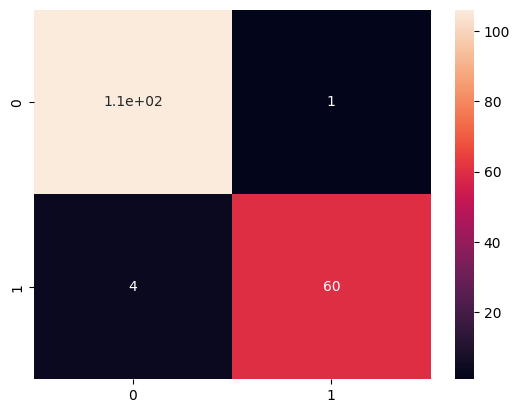

In [35]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(test_y, y_pred)
sns.heatmap(cm,annot=True)